**Libraries**

In [ ]:
## LIBRARIES

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
from scipy.stats import loguniform

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

In [ ]:


def generate_linear_function():
    # Generate 5 random weights between 0 and 1
    weights = np.random.rand(4)
    # Generate a random bias between 0 and 1
    bias = np.random.rand()

    def linear_function(input_values):
        # Calculate the dot product of weights and input values
        result = np.dot(weights, input_values)
        # Add bias
        result += bias
        return result

    return linear_function

# Example dataset with 1000 rows and 4 columns
dataset = np.random.randint(-100, 101, size=(1000, 4))

# Generate random weights and bias
linear_func = generate_linear_function()

# Evaluate f(x) for each row in the dataset
labels = []
for row in dataset:
    # Evaluate the linear function for the current row
    result = linear_func(row)
    # Label as positive if result is greater than or equal to zero, otherwise label as negative
    label = 1 if result >= 0 else 0
    labels.append(label)


labels = np.array(labels)
labels=labels.reshape(-1,1)
# print("Labels:", labels)

dataset=np.concatenate((dataset, labels),axis=1)
print(dataset)

np.savetxt('dataset.txt',dataset,fmt='%d')
print("Dataset saved to txt file.")

[[-56 -31  41  21   1]
 [ 81  58 -69  51   1]
 [-46  11  49  21   1]
 ...
 [ -2 -98  95  11   1]
 [ 30  39 -33  -4   0]
 [ 20   8 -37  83   1]]
Dataset saved to txt file.


In [ ]:
# df = pd.read_csv('dataset.txt')
column_names = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']

# df is a dataframe created using the dataset and it also has column names
df = pd.DataFrame(dataset, columns=column_names)
print(df.head())

   Column1  Column2  Column3  Column4  Column5
0      -56      -31       41       21        1
1       81       58      -69       51        1
2      -46       11       49       21        1
3       65       99       20      -60        1
4       67       11      -68       12        0


In [ ]:
X = df.drop(columns=['Column5'])
y = df['Column5']



In [ ]:
print(X.head())

   Column1  Column2  Column3  Column4
0      -56      -31       41       21
1       81       58      -69       51
2      -46       11       49       21
3       65       99       20      -60
4       67       11      -68       12


In [ ]:
print(y.head())
# y.info()

0    1
1    1
2    1
3    1
4    0
Name: Column5, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print(X_test)

     Column1  Column2  Column3  Column4
507      -68      -84       83      -39
818      -75       -4       88       71
452      -60       52       51      -75
368      -17       92      -76      -65
242        8       -6      -59      -54
..       ...      ...      ...      ...
430       69       66       79        1
874      -43      -71      -64       51
550      -40      -42       28       44
608        7       21       52       19
207       27       75       60       15

[200 rows x 4 columns]


In [ ]:
print(y_test)

507    0
818    1
452    1
368    0
242    0
      ..
430    1
874    0
550    1
608    1
207    1
Name: Column5, Length: 200, dtype: int64


In [ ]:
# y_train_reshaped = y_train.reshape(-1, 1)
y_train_reshaped = y_train.to_numpy().reshape(-1, 1)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

train_data = np.concatenate((X_train,y_train_reshaped),axis=1)
print(train_data)

np.savetxt('train.txt',train_data,fmt='%d')
print("Training data saved to txt file.")


[[-28  35  52 -38   1]
 [ 29 -75 -23 -42   0]
 [ 24 -99 -69  30   0]
 ...
 [ 97  42  -6  60   1]
 [-73  25  64  41   1]
 [-97  14  26  11   1]]
Training data saved to txt file.


In [ ]:
np.savetxt('test.txt',X_test,fmt='%d')
print("Test data saved to txt file.")

Test data saved to txt file.


In [ ]:
# normalize data

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print(X_train_normalized)

[[0.35678392 0.675      0.76       0.31      ]
 [0.64321608 0.125      0.385      0.29      ]
 [0.61809045 0.005      0.155      0.65      ]
 ...
 [0.98492462 0.71       0.47       0.8       ]
 [0.13065327 0.625      0.82       0.705     ]
 [0.01005025 0.57       0.63       0.555     ]]


In [ ]:
## Perceptron Learning Algorithm

class Perceptron:
    def __init__(self, num_features, learning_rate=0.01):
        self.weights_array = np.zeros(num_features+1)
        # self.bias = np.random.rand()
        self.learning_rate = learning_rate

    def predict(self, x):
        # Add bias term
        x = np.insert(x, 0,-1)
        activation = np.dot(self.weights_array, x)
        # print(activation)
        return 1 if activation >= 0 else 0

    def train(self, X, y):
        num_samples,num_features=X.shape
        converge= False
        # iteration=0
        while not converge:

            for i in range(num_samples):
                prediction = self.predict(X[i])
                # print(f"{prediction} for {y[i]}")
                if prediction != y[i]:
                    # converge=False
                    x = np.insert(X[i], 0,-1)  # Add bias term
                    if y[i] == 1:
                      self.weights_array+= x
                      # print(self.weights_array)
                    else:
                      self.weights_array -= x
                      # print(self.weights_array)
                    converge=True


perceptron = Perceptron(num_features = 4)
perceptron.train(X_train_normalized, y_train_reshaped)


In [ ]:
## Accuracy

def calculate_accuracy(model, X, y):
    correct_predictions = 0
    num_samples,num_features=X.shape
    for i in range(num_samples):

        prediction = perceptron.predict(X[i])

        if prediction == y[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X)
    return accuracy


train_accuracy = calculate_accuracy(perceptron, X_train_normalized, y_train_reshaped)
test_accuracy=calculate_accuracy(perceptron, X_test_normalized,y_test_reshaped)
print(train_accuracy)
print(test_accuracy)

def accuracy_score(y,y_pred):
    num_correct=np.sum(y==y_pred)

    total=len(y_pred)

    accuracy=num_correct/total
    return accuracy

0.90625
0.905


In [ ]:
## testing accuracy

y_pred = [perceptron.predict(x) for x in X_test_normalized]


accuracy=accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: operands could not be broadcast together with shapes (258,) (200,) 

In [ ]:
## testing on proportions


proportions = [0.2, 0.5, 0.7]

# Train and evaluate the model for each proportion of training data
for p in proportions:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train_normalized, y_train_reshaped, test_size=1 - p, random_state=42)

    # Initialize and train the perceptron model
    perceptron_prop = Perceptron(num_features=X.shape[1])
    perceptron_prop.train(X_train, y_train)

    # Calculate training accuracy
    train_accuracy= calculate_accuracy(perceptron_prop,X_train, y_train)

    # Calculate testing accuracy
    test_accuracy = calculate_accuracy(perceptron_prop,X_test, y_test)

    # Print results
    print(f"Training Proportion: {p * 100}%")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    print()

Training Proportion: 20.0%
Training Accuracy: 0.91
Testing Accuracy: 0.91

Training Proportion: 50.0%
Training Accuracy: 0.89
Testing Accuracy: 0.92

Training Proportion: 70.0%
Training Accuracy: 0.90
Testing Accuracy: 0.92



Q2

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("no. of samples: %d" % n_samples)
print("no. of features: %d" % n_features)
print("no. of classes: %d" % n_classes)


Total dataset size:
no. of samples: 1288
no. of features: 1850
no. of classes: 7


In [ ]:
# print(X.np.head())
print(X[:5])  # Print the first 5 rows


[[0.9973857  0.99607843 0.9921568  ... 0.38169935 0.38823533 0.3803922 ]
 [0.14771242 0.19738562 0.1751634  ... 0.45751634 0.44444445 0.53594774]
 [0.34379086 0.39477125 0.49150327 ... 0.709804   0.72156864 0.7163399 ]
 [0.04705882 0.01699346 0.02352941 ... 0.06535948 0.14248367 0.20130719]
 [0.47189546 0.45882353 0.4862745  ... 0.07843138 0.2509804  0.2784314 ]]


In [ ]:
print(y[:5])

[5 6 3 1 0]


In [ ]:
## splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)



In [ ]:
n =50


pca = PCA(n_components=n, svd_solver='randomized', whiten=True)
pca.fit(X_train)


X_train_pca =pca.transform(X_train)
X_test_pca=pca.transform(X_test)


In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca,y_train)

KNeighborsClassifier()

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1073.836800491008, class_weight='balanced', gamma=0.015012992024961749)
Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.78      0.78        18
     Colin Powell       0.84      0.80      0.82        46
  Donald Rumsfeld       0.85      0.85      0.85        20
    George W Bush       0.92      0.95      0.94       106
Gerhard Schroeder       0.74      0.74      0.74        23
      Hugo Chavez       0.81      0.87      0.84        15
       Tony Blair       0.74      0.67      0.70        30

         accuracy                           0.85       258
        macro avg       0.81      0.81      0.81       258
     weighted avg       0.85      0.85      0.85       258



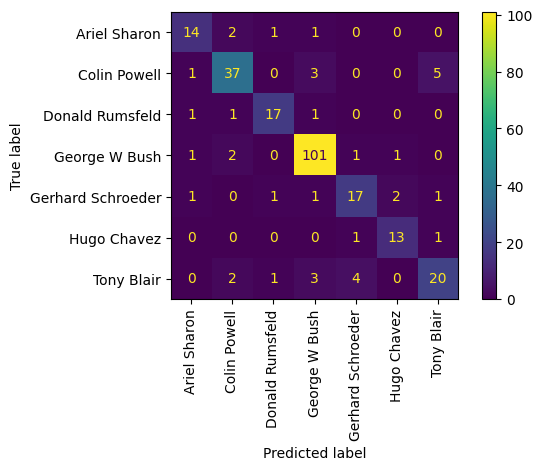

In [ ]:
print("Fitting the classifier to the training set")

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
y_pred = knn_classifier.predict(X_test_pca)

In [ ]:
## report accuracy

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6821705426356589


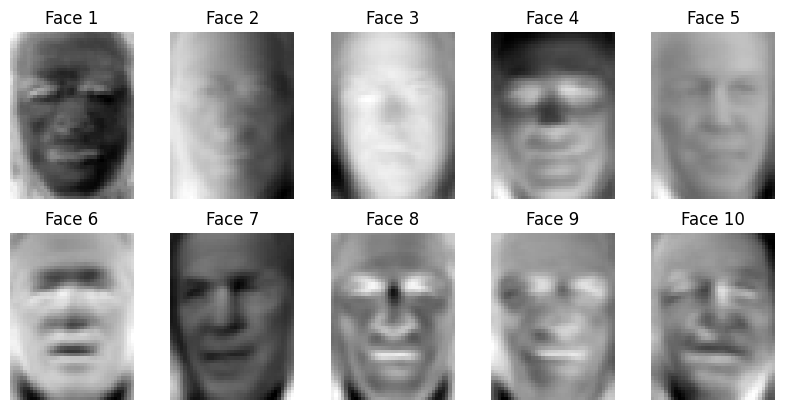

In [ ]:
## visualize a subset of eigenfaces

plt.figure(figsize=(10, 10))
for iter in range(10):
    plt.subplot(4,5,iter + 1)
    plt.imshow(eigenfaces[iter], cmap=plt.cm.gray)
    plt.title(f"Face {iter+1}")
    plt.axis('off')
plt.show()


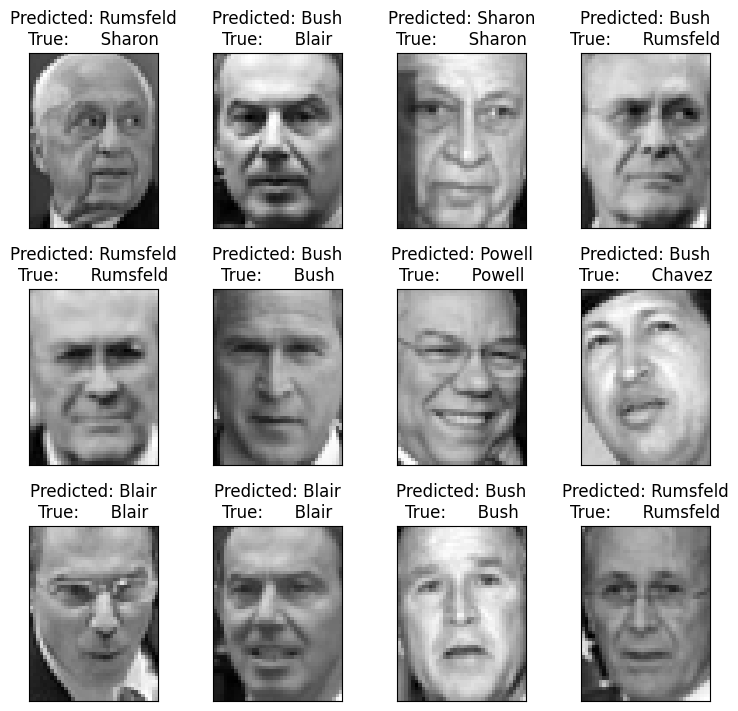

In [ ]:
def plot_gallery(images, titles, height, width, n_row=3, n_col=4):
    """Helper function to plot a gallery of images"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def generate_title(predicted_labels, true_labels, target_names, index):
    predicted_name = target_names[predicted_labels[index]].rsplit(" ", 1)[-1]
    true_name = target_names[true_labels[index]].rsplit(" ", 1)[-1]
    return "Predicted: %s\nTrue:      %s" % (predicted_name, true_name)


prediction_titles = [
    generate_title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)


In [ ]:
n_components_range = [90,150,200,250,300]

# Initialize lists to store results
accuracies = []

for n_components in n_components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy for n_components={n_components}: {accuracy}")

Accuracy for n_components=90: 0.5348837209302325
Accuracy for n_components=150: 0.5310077519379846
Accuracy for n_components=200: 0.5155038759689923
Accuracy for n_components=250: 0.5232558139534884
Accuracy for n_components=300: 0.5271317829457365
